In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "./big_social_media_data.csv"
df = pd.read_csv(file_path)

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014 entries, 0 to 10013
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Post_ID    10014 non-null  int64 
 1   Platform   10014 non-null  object
 2   Likes      10014 non-null  int64 
 3   Comments   10014 non-null  int64 
 4   Shares     10014 non-null  int64 
 5   Views      10014 non-null  int64 
 6   Post_Date  10014 non-null  object
dtypes: int64(5), object(2)
memory usage: 547.8+ KB
None


In [4]:
print(df.describe())

            Post_ID         Likes      Comments        Shares          Views
count  10014.000000  10014.000000  10014.000000  10014.000000   10014.000000
mean    5007.500000   5007.508488   1002.413022   2486.415219  497915.527961
std     2890.937132   2891.637175    576.567304   1442.476977  287977.371601
min        1.000000     51.000000      5.000000      1.000000     504.000000
25%     2504.250000   2465.000000    498.000000   1223.000000  249534.750000
50%     5007.500000   5003.000000   1005.500000   2477.000000  496876.500000
75%     7510.750000   7536.000000   1499.000000   3732.750000  748069.750000
max    10014.000000   9999.000000   1999.000000   4999.000000  999998.000000


In [5]:
print(df.head())

   Post_ID  Platform  Likes  Comments  Shares   Views            Post_Date
0        1   Twitter   6103       561    3971  110215  2023-01-01 00:00:00
1        2    TikTok   8972       420    1660  999982  2023-01-01 00:01:00
2        3  Facebook   3638      1478    1218  247579  2023-01-01 00:02:00
3        4   YouTube   3110      1996    1222  368908  2023-01-01 00:03:00
4        5    TikTok   8888       895     653   31176  2023-01-01 00:04:00


In [6]:
df['Post_Date'] = pd.to_datetime(df['Post_Date'])

In [7]:
platform_counts = df['Platform'].value_counts()

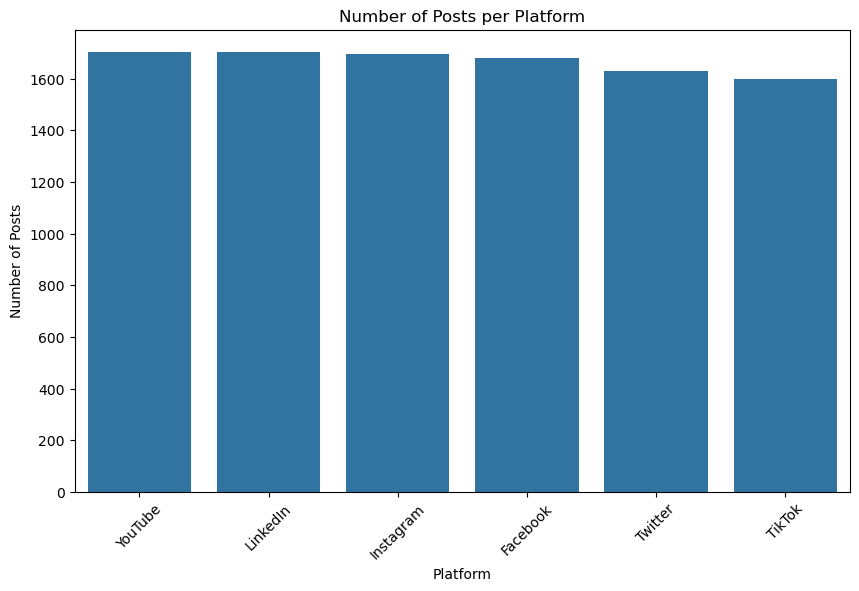

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x=platform_counts.index, y=platform_counts.values)
plt.title("Number of Posts per Platform")
plt.xlabel("Platform")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)  # Rotates labels for better readability
plt.show()

In [9]:
platform_engagement = df.groupby('Platform')[['Likes', 'Comments', 'Shares', 'Views']].mean().reset_index()

<Axes: xlabel='Platform', ylabel='Likes'>

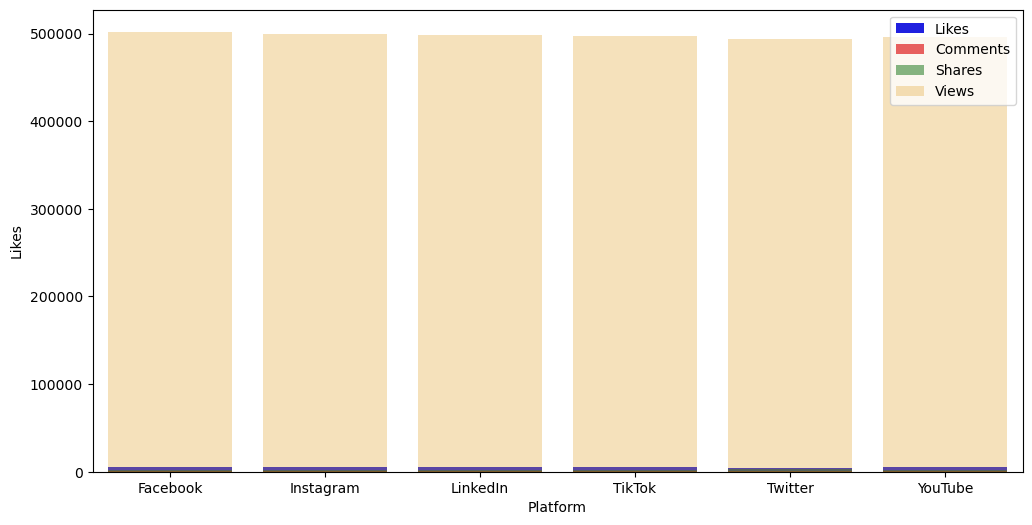

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Platform", y="Likes", data=platform_engagement, color="blue", label="Likes")
sns.barplot(x="Platform", y="Comments", data=platform_engagement, color="red", label="Comments", alpha=0.7)
sns.barplot(x="Platform", y="Shares", data=platform_engagement, color="green", label="Shares", alpha=0.5)
sns.barplot(x="Platform", y="Views", data=platform_engagement, color="orange", label="Views", alpha=0.3)

In [13]:
user_post_count = df['User'].value_counts().head(10)
user_post_count.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Active Users')
plt.xlabel('User')
plt.ylabel('Number of Posts')
plt.show()

In [15]:
plt.title("Average Engagement per Platform")
plt.xlabel("Platform")
plt.ylabel("Average Count")
plt.legend()
plt.xticks(rotation=45)  # Rotates labels for better readability
plt.show()